# Borwein積分

黒木玄

2019-06-13

* Copyright 2019 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT
* Repository: https://github.com/genkuroki/Calculus

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/A03%20Borwein%20integral.ipynb

* https://genkuroki.github.io/documents/Calculus/A03%20Borwein%20integral.pdf

このファイルは [Free Wolfram Engine](https://www.wolfram.com/engine/) を [Jupyter](https://jupyter.org/) で[使えるようにする](https://github.com/WolframResearch/WolframLanguageForJupyter)と利用できる. 詳しくは次の解説を参照せよ.

* [Free Wolfram EngineをJupyterで使う方法](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/Free%20Wolfram%20Engine.ipynb)

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\T{{\mathbb T}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
\newcommand\sech{\operatorname{sech}}
\newcommand\cosec{\operatorname{cosec}}
\newcommand\sign{\operatorname{sign}}
\newcommand\sinc{\operatorname{sinc}}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
\newcommand\Li{\operatorname{Li}}
\newcommand\PROD{\mathop{\coprod\kern-1.35em\prod}}
\newcommand\Si{\operatorname{Si}}
\newcommand\Ci{\operatorname{Ci}}
\newcommand\si{\operatorname{si}}
\newcommand\Cin{\operatorname{Cin}}
\newcommand\Fourier{\operatorname{\mathscr{F}}}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Borwein積分の紹介" data-toc-modified-id="Borwein積分の紹介-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Borwein積分の紹介</a></span></li><li><span><a href="#Borwein積分の公式" data-toc-modified-id="Borwein積分の公式-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Borwein積分の公式</a></span><ul class="toc-item"><li><span><a href="#Borwein積分の公式の証明" data-toc-modified-id="Borwein積分の公式の証明-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Borwein積分の公式の証明</a></span></li><li><span><a href="#公式($\boldsymbol{**}$)の証明" data-toc-modified-id="公式($\boldsymbol{**}$)の証明-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>公式($\boldsymbol{**}$)の証明</a></span></li><li><span><a href="#sinの積をsinまたはcosの和で表す公式の証明" data-toc-modified-id="sinの積をsinまたはcosの和で表す公式の証明-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>sinの積をsinまたはcosの和で表す公式の証明</a></span></li></ul></li><li><span><a href="#Borwein積分とFourier変換の関係" data-toc-modified-id="Borwein積分とFourier変換の関係-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Borwein積分とFourier変換の関係</a></span><ul class="toc-item"><li><span><a href="#Fourier解析からの準備" data-toc-modified-id="Fourier解析からの準備-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fourier解析からの準備</a></span></li><li><span><a href="#Borwein積分のたたみ込み積表示とその応用" data-toc-modified-id="Borwein積分のたたみ込み積表示とその応用-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Borwein積分のたたみ込み積表示とその応用</a></span></li></ul></li></ul></div>

In [1]:
JupyterImageResolution = 84;
JupyterOutTextForm = "TeX";

TeX[x_] := ToString[TeXForm[x]]
TeX[x_, y__] := StringJoin[TeX[x], TeX[y]]
TeXRaw[x__, y_] := StringJoin[x, TeX[y]]

MappedBy[x_] := x
MappedBy[x_, F___, G_] := MappedBy[x, F] // G

SetAttributes[TeXEq, HoldFirst]
TeXEq[x_] := TeX[HoldForm[x] == MappedBy[x, ReleaseHold, FullSimplify]]
TeXEq[x_, F__] := TeX[HoldForm[x] == MappedBy[x, ReleaseHold, F]]
TeXEqRaw[x_] := TeX[HoldForm[x] == MappedBy[x, ReleaseHold]]

## Borwein積分の紹介

以下では $a_0,a_1,\ldots,a_r$ は正の実数であるとし, $\sinc$ 函数を

$$
\sinc x = \begin{cases}
\dfrac{\sin x}{x} & (x\ne 0) \\
\;\;\,1 & (x=0) \\
\end{cases}
$$

と定めて利用する.

次の形の積分を[**Borwein積分**](https://en.wikipedia.org/wiki/Borwein_integral)と呼ぶ:

$$
\int_{-\infty}^\infty\prod_{k=0}^r\sinc(a_k x)\,dx = 
\int_{-\infty}^\infty \sinc(a_0 x)\sinc(a_1 x)\cdots\sinc(a_r x)\,dx
$$

必要ならば条件収束する広義積分でこれを定義しておく. 例えば,

In [15]:
Integrate[Sinc[x], {x,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \text{sinc}(x) \, dx=\pi$$

上の結果はDirichlet積分の公式

$$
\int_{-\infty}^\infty \frac{\sin(a x)}{x}\,dx = \pi\sign(a)
$$

の特別な場合として有名である.

In [16]:
Integrate[Sinc[x]Sinc[x/3], {x,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \text{sinc}(x) \text{sinc}\left(\frac{x}{3}\right) \, dx=\pi$$

In [17]:
Integrate[Sinc[x]Sinc[x/3]Sinc[x/5], {x,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \text{sinc}(x) \text{sinc}\left(\frac{x}{3}\right) \text{sinc}\left(\frac{x}{5}\right) \, dx=\pi$$

In [18]:
Integrate[Sinc[x]Sinc[x/3]Sinc[x/5]Sinc[x/7], {x,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \text{sinc}(x) \text{sinc}\left(\frac{x}{3}\right) \text{sinc}\left(\frac{x}{5}\right) \text{sinc}\left(\frac{x}{7}\right) \, dx=\pi$$

In [19]:
Integrate[Sinc[x]Sinc[x/3]Sinc[x/5]Sinc[x/7]Sinc[x/9], {x,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \text{sinc}(x) \text{sinc}\left(\frac{x}{3}\right) \text{sinc}\left(\frac{x}{5}\right) \text{sinc}\left(\frac{x}{7}\right) \text{sinc}\left(\frac{x}{9}\right) \, dx=\pi$$

In [20]:
Integrate[Sinc[x]Sinc[x/3]Sinc[x/5]Sinc[x/7]Sinc[x/9]Sinc[x/11], {x,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \text{sinc}(x) \text{sinc}\left(\frac{x}{3}\right) \text{sinc}\left(\frac{x}{5}\right) \text{sinc}\left(\frac{x}{7}\right) \text{sinc}\left(\frac{x}{9}\right) \text{sinc}\left(\frac{x}{11}\right) \, dx=\pi$$

In [21]:
Integrate[Sinc[x]Sinc[x/3]Sinc[x/5]Sinc[x/7]Sinc[x/9]Sinc[x/11]Sinc[x/13], {x,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \text{sinc}(x) \text{sinc}\left(\frac{x}{3}\right) \text{sinc}\left(\frac{x}{5}\right) \text{sinc}\left(\frac{x}{7}\right) \text{sinc}\left(\frac{x}{9}\right) \text{sinc}\left(\frac{x}{11}\right) \text{sinc}\left(\frac{x}{13}\right) \, dx=\pi$$

以上のBorwien積分の値はすべて $\pi$ になった. しかし, これの次の積分は以下のように $\pi$ とは異なる $\pi$ に非常に近い値になる!

In [22]:
Integrate[Sinc[x]Sinc[x/3]Sinc[x/5]Sinc[x/7]Sinc[x/9]Sinc[x/11]Sinc[x/13]Sinc[x/15], {x,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \text{sinc}(x) \text{sinc}\left(\frac{x}{3}\right) \text{sinc}\left(\frac{x}{5}\right) \text{sinc}\left(\frac{x}{7}\right) \text{sinc}\left(\frac{x}{9}\right) \text{sinc}\left(\frac{x}{11}\right) \text{sinc}\left(\frac{x}{13}\right) \text{sinc}\left(\frac{x}{15}\right) \, dx=\frac{467807924713440738696537864469 \pi }{467807924720320453655260875000}$$

In [23]:
467807924713440738696537864469/467807924720320453655260875000 // TeXEq[#, N[#, 20]&]&

$$\frac{467807924713440738696537864469}{467807924720320453655260875000}=0.9999999999852937186$$

このように

$$
\frac{467807924713440738696537864469}{467807924720320453655260875000}\pi
$$

の値は非常に $\pi$ に近い.  「これは使用しているWolfram言語のバグなのではないだろうか?」と疑う人がいても不思議ではない結果である.

## Borwein積分の公式

以下で紹介する結果については

* David Borwein and Jonathan M. Borwein.  Some Remarkable Properties of Sinc and Related Integrals.  The Ramanujan Journal, March 2001, Volume 5, Issue 1, pp 73–89. [PDF](http://www.thebigquestions.com/borweinintegrals.pdf)

を参照した.

$a_0,a_1,\ldots,a_r>0$ と仮定する. この節では次の公式を示そう:

$$
\begin{aligned}
\int_{-\infty}^\infty \prod_{k=0}^r \sinc(a_k x)\,dx &=
\frac{\pi}{r! 2^r a_0 a_1\cdots a_r}
\\ &\,\times 
\sum_{\eps_1,\ldots,\eps_r=\pm1}
\eps_1\cdots\eps_r
\left(a_0+\sum_{k=1}^r\eps_k a_k\right)^r
\sign
\left(a_0+\sum_{k=1}^r\eps_k a_k\right).
\end{aligned}
\tag{$*$}
$$

さらに次の公式も示す:

$$
\sum_{\eps_1,\ldots,\eps_r=\pm1}
\eps_1\cdots\eps_r
\left(a_0+\sum_{k=1}^r\eps_k a_k\right)^k =
\begin{cases}
0 & (k=0,1,\ldots,r-1) \\
r! 2^r a_1\cdots a_r & (k=r) 
\\
(r+1)! 2^r a_0 a_1\cdots a_r & (k=r+1). \\
\end{cases}
\tag{$**$}
$$

特に $a_0 > a_1+\cdots+a_r$ ならば($*$)の $\sign$ の因子がすべて $1$ になり, ($**$)の $k=r$ の場合を使うと,

$$
\int_{-\infty}^\infty \prod_{k=0}^r \sinc(a_k x)\,dx = \frac{\pi}{a_0}
\quad (a_0 > a_1+\cdots+a_r)
$$

が得られる. 前節の計算例の最後以外はこの公式の $a_0=1$ の場合になっている.

さらに, $a_0 < a_1+\cdots+a_r$ でかつ $\eps_1=\cdots=\eps_r=-1$ 以外のとき $a_0+\sum_{k=1}^r\eps_k a_k>0$ となるならば, 

$$
\int_{-\infty}^\infty \prod_{k=0}^r \sinc(a_k x)\,dx = 
\frac{\pi}{a_0}\left(
1 - \frac{\left(a_1+\cdots+a_r-a_0\right)^r}{r! 2^{r-1} a_1\cdots a_r}
\right)
$$

が得られる.  前節の計算例の最後はこの公式の $a_0=1$ の場合になっている.

In [24]:
1/3+1/5+1/7+1/9+1/11+1/13 // TeXEq

$$\frac{1}{3}+\frac{1}{5}+\frac{1}{7}+\frac{1}{9}+\frac{1}{11}+\frac{1}{13}=\frac{43024}{45045}$$

In [25]:
1/3+1/5+1/7+1/9+1/11+1/13+1/15 // TeXEq

$$\frac{1}{3}+\frac{1}{5}+\frac{1}{7}+\frac{1}{9}+\frac{1}{11}+\frac{1}{13}+\frac{1}{15}=\frac{46027}{45045}$$

In [26]:
Integrate[Sinc[x]Sinc[x/3]Sinc[x/5]Sinc[x/7]Sinc[x/9]Sinc[x/11]Sinc[x/13]Sinc[x/15], {x,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \text{sinc}(x) \text{sinc}\left(\frac{x}{3}\right) \text{sinc}\left(\frac{x}{5}\right) \text{sinc}\left(\frac{x}{7}\right) \text{sinc}\left(\frac{x}{9}\right) \text{sinc}\left(\frac{x}{11}\right) \text{sinc}\left(\frac{x}{13}\right) \text{sinc}\left(\frac{x}{15}\right) \, dx=\frac{467807924713440738696537864469 \pi }{467807924720320453655260875000}$$

In [27]:
Pi(1 - (1/3+1/5+1/7+1/9+1/11+1/13+1/15-1)^7/(7! 2^6 (1/3)(1/5)(1/7)(1/9)(1/11)(1/13)(1/15))) // TeXEq

$$\pi \left(1-\frac{\left(\frac{1}{3}+\frac{1}{5}+\frac{1}{7}+\frac{1}{9}+\frac{1}{11}+\frac{1}{13}+\frac{1}{15}-1\right)^7}{\frac{7! 2^6}{3\ 5\ 7\ 9\ 11\ 13\ 15}}\right)=\frac{467807924713440738696537864469 \pi }{467807924720320453655260875000}$$

### Borwein積分の公式の証明

三角函数に関する簡単な計算によって以下が成立していることを示せる.

$r$ が偶数のとき,

$$
\prod_{k=0}^r \sin(a_k x) =
\frac{(-1)^{r/2}}{2^r}
\sum_{\eps_1,\ldots,\eps_r=\pm1}
\eps_1\cdots\eps_r \sin\left(\left(a_0+\sum_{k=1}^r\eps_k a_k\right)x\right).
$$

$r$ が奇数のとき, 

$$
\prod_{k=0}^r \sin(a_k x) =
\frac{(-1)^{(r+1)/2}}{2^r}
\sum_{\eps_1,\ldots,\eps_r=\pm1}
\eps_1\cdots\eps_r \cos\left(\left(a_0+\sum_{k=1}^r\eps_k a_k\right)x\right).
$$

これらの公式の両辺を $r$ 回 $x$ で微分すると, $r$ の偶奇によらず, 結果は次のようになることがすぐにわかる:

$$
\left(\frac{\d}{\d x}\right)^r
\prod_{k=0}^r \sin(a_k x) =
\frac{1}{2^r}
\sum_{\eps_1,\ldots,\eps_r=\pm1}
\eps_1\cdots\eps_r
\left(a_0+\sum_{k=1}^r\eps_k a_k\right)^r
\sin\left(\left(a_0+\sum_{k=1}^r\eps_k a_k\right)x\right).
$$

この公式を使うと, Borwein積分の公式($*$)は部分積分によって容易に証明される.

$$
\frac{1}{r!}\left(-\frac{\d}{\d x}\right)^r\frac{1}{x} = \frac{1}{x^{r+1}}
$$

を使って, 部分積分を $r$ 回繰り返すと, 

$$
\begin{aligned}
\int_{-\infty}^\infty \prod_{k=0}^r \sinc(a_k x)\,dx &=
\frac{1}{a_0a_1\cdots a_r}
\int_{-\infty}^\infty \frac{1}{x^{r+1}} \prod_{k=0}^r \sin(a_k x)\,dx
\\ &=
\frac{1}{r! a_0a_1\cdots a_r}
\int_{-\infty}^\infty \frac{1}{x}\;\left(\frac{\d}{\d x}\right)^r\prod_{k=0}^r \sin(a_k x)\,dx
\\ &=
\frac{1}{r! 2^r a_0a_1\cdots a_r}
\\ &\,\times
\sum_{\eps_1,\ldots,\eps_r=\pm1}
\eps_1\cdots\eps_r
\left(a_0+\sum_{k=1}^r\eps_k a_k\right)^r
\int_{-\infty}^\infty\frac{1}{x}
\sin\left(\left(a_0+\sum_{k=1}^r\eps_k a_k\right)x\right)
\,dx
\\ &=
\frac{1}{r! 2^r a_0a_1\cdots a_r}
\\ &\,\times
\sum_{\eps_1,\ldots,\eps_r=\pm1}
\eps_1\cdots\eps_r
\left(a_0+\sum_{k=1}^r\eps_k a_k\right)^r
\sign
\left(a_0+\sum_{k=1}^r\eps_k a_k\right).
\end{aligned}
$$

これが示したかったBorwein積分の公式($*$)である:

$$
\begin{aligned}
\int_{-\infty}^\infty \prod_{k=0}^r \sinc(a_k x)\,dx &=
\frac{\pi}{r! 2^r a_0 a_1\cdots a_r}
\\ &\,\times 
\sum_{\eps_1,\ldots,\eps_r=\pm1}
\eps_1\cdots\eps_r
\left(a_0+\sum_{k=1}^r\eps_k a_k\right)^r
\sign
\left(a_0+\sum_{k=1}^r\eps_k a_k\right).
\end{aligned}
\tag{$*$}
$$

### 公式($\boldsymbol{**}$)の証明

$$
\begin{aligned}
e^{a_0 t}\prod_{k=1}^r(e^{a_k t}-e^{-a_k t}) &=
e^{a_0 t}\prod_{k=1}^r\sum_{\eps_k=\pm1}\eps_k e^{\eps_k a_k t}
\\ &=
\sum_{\eps_1,\ldots,\eps_r=\pm1}\eps_1\cdots\eps_r 
\exp\left(\left(a_0+\sum_{k=1}^r\eps_k a_k\right)t\right).
\end{aligned}
$$

左辺の $t$ に関するべき級数の展開は

$$
(1+a_0 t + O(t^2))(2^r a_1\cdots a_r t^r + O(t^{r+2})) =
2^r a_1\cdots a_r t^r + 2^r a_0 a_1\cdots a_r t^{r+1} + O(t^{r+2})
$$

となり, 右辺は

$$
\sum_{k=0}^\infty \frac{t^k}{k!}
\sum_{\eps_1,\ldots,\eps_r=\pm1}\eps_1\cdots\eps_r
\left(a_0+\sum_{k=1}^r\eps_k a_k\right)^k
$$

となる. $k=0,1,\ldots,r,r-1$ に関する $t^k$ の係数を比較すると公式 ($**$) が得られる:

$$
\sum_{\eps_1,\ldots,\eps_r=\pm1}
\eps_1\cdots\eps_r
\left(a_0+\sum_{k=1}^r\eps_k a_k\right)^k =
\begin{cases}
0 & (k=0,1,\ldots,r-1) \\
r! 2^r a_1\cdots a_r & (k=r) 
\\
(r+1)! 2^r a_0 a_1\cdots a_r & (k=r+1). \\
\end{cases}
\tag{$**$}
$$

### sinの積をsinまたはcosの和で表す公式の証明

sinの積に関する公式も証明しておこう.

$$
\sin z = \dfrac{e^{iz}-e^{-iz}}{2i} =
\frac{1}{2i}\sum_{\eps=\pm1}\eps e^{i\eps z}
$$

を使うと, 

$$
\begin{aligned}
\prod_{k=0}^r\sin(a_k x) &=
\frac{1}{(2i)^{r+1}}(e^{ia_0x}-e^{-ia_0x})
\sum_{\eps_1,\ldots,\eps_r=\pm1}\eps_1\cdots\eps_r e^{i\left(\sum_{k=1}^r \eps_k a_k\right) x}
\\ &=
\frac{1}{(2i)^{r+1}}\left(
\sum_{\eps_1,\ldots,\eps_r=\pm1}\eps_1\cdots\eps_r e^{i\left(a_0+\sum_{k=1}^r \eps_k a_k\right) x} -
\sum_{\eps_1,\ldots,\eps_r=\pm1}\eps_1\cdots\eps_r e^{i\left(-a_0+\sum_{k=1}^r \eps_k a_k\right) x}
\right)
\\ &=
\frac{1}{(2i)^{r+1}}\left(
\sum_{\eps_1,\ldots,\eps_r=\pm1}\eps_1\cdots\eps_r e^{i\left(a_0+\sum_{k=1}^r \eps_k a_k\right) x} -
(-1)^r
\sum_{\eps_1,\ldots,\eps_r=\pm1}\eps_1\cdots\eps_r e^{-i\left(a_0+\sum_{k=1}^r \eps_k a_k\right) x}
\right)
\\ &=
\frac{1}{(2i)^{r+1}}
\sum_{\eps_1,\ldots,\eps_r=\pm1}\eps_1\cdots\eps_r
\left(
e^{i\left(a_0+\sum_{k=1}^r \eps_k a_k\right) x} -
(-1)^r
e^{-i\left(a_0+\sum_{k=1}^r \eps_k a_k\right) x}
\right).
\end{aligned}
$$

3番目の等号で括弧の中の2つ目の和の $\eps_k$ 達をすべて $-1$ 倍にした. この結果は, $r$ が偶数のとき,

$$
\prod_{k=0}^r \sin(a_k x) =
\frac{(-1)^{r/2}}{2^r}
\sum_{\eps_1,\ldots,\eps_r=\pm1}
\eps_1\cdots\eps_r \sin\left(\left(a_0+\sum_{k=1}^r\eps_k a_k\right)x\right)
$$

になり, $r$ が奇数のとき, 

$$
\prod_{k=0}^r \sin(a_k x) =
\frac{(-1)^{(r+1)/2}}{2^r}
\sum_{\eps_1,\ldots,\eps_r=\pm1}
\eps_1\cdots\eps_r \cos\left(\left(a_0+\sum_{k=1}^r\eps_k a_k\right)x\right)
$$

になる.  これが示したい公式であった.  

このように奇数個の $\sin$ の積は $\sin$ の和に展開され, 偶数個の $\sin$ の積は $\cos$ の和に展開される.

## Borwein積分とFourier変換の関係

### Fourier解析からの準備

Fourier変換 $f(x)\mapsto\Fourier[f(x)](p)$ とその逆変換 $\phi(p)\mapsto\Fourier^{-1}[\phi(p)](x)$ が次のように定義される:

$$
\Fourier[f(x)](p) = \int_{-\infty}^\infty e^{-ipx}f(x)\,dx, \quad
\Fourier^{-1}[\phi(p)](x) = \int_{-\infty}^\infty e^{ipx}\phi(p)\,\frac{dp}{2\pi}.
$$

さらに, 函数 $\phi(p),\psi(p)$ のたたみ込み積が

$$
\phi*\psi(p)\, = \int_{-\infty}^\infty \phi(q)\psi(p-q)\,\frac{dq}{2\pi}
$$

と定義される. このとき, 

$$
\int_{-\infty}^\infty \phi*\psi(p)\,\frac{dp}{2\pi} =
\left(\int_{-\infty}^\infty \phi(p)\,\frac{dp}{2\pi}\right)
\left(\int_{-\infty}^\infty \psi(p)\,\frac{dp}{2\pi}\right).
$$

さらに, 函数 $f(x),g(x)$ に関する適切な仮定のもとで次が成立することを示せる:

$$
\Fourier[f(x)g(x)] = \Fourier[f(x)]*\Fourier[g(x)].
$$

**例:** $a>0$ に対して, $\chi_a(p)$ を

$$
\chi_a(p) = 
\begin{cases}
\;1 & (-a<p<a) \\
1/2 & (p=\pm a) \\
\;0 & (\text{otherwise}). \\
\end{cases}
$$

と定める. このとき,

$$
\Fourier^{-1}[\chi_a(p)](x) =
\int_{-a}^a e^{ipx}\,\frac{dp}{2\pi} = 
\frac{e^{iax}-e^{-iax}}{2\pi i x} =
\frac{\sin(a x)}{\pi x} = 
\frac{a}{\pi}\sinc(ax).
$$

ゆえに

$$
\Fourier\left[\sinc(ax)\right](p) = \frac{\pi}{a}\chi_a(p).
$$

さらに

$$
\int_{-\infty}^\infty \frac{\pi}{a}\chi_a(p)\,\frac{dp}{2\pi} =
\int_{-a}^a \frac{\pi}{a}\,\frac{dp}{2\pi} = 1
$$

が成立していることにも注意せよ. $\QED$

### Borwein積分のたたみ込み積表示とその応用

Borwein積分は次のFourier変換の $p=0$ での値に等しい:

$$
I(p) = 
\Fourier\left[\prod_{k=0}^r \sinc(a_k x)\right](p)=
\int_{-\infty}^\infty e^{-ipx}\prod_{k=0}^r \sinc(a_k x)\,dx.
$$

積のFourier変換はFourier変換のたたみ込み積に等しいので,

$$
I(p) = g_0*g_1*\cdots*g_r(p).
$$

ここで,

$$
g_k(p) = \Fourier[\sinc(a_k x)](p) = \frac{\pi}{a}\chi_a(p)
$$

特に $p=0$ のとき,

$$
I(0) = \frac{\pi}{a_0}\int_{-a_0}^{a_0} g_1*\cdots*g_r(p)\,\frac{dp}{2\pi}.
$$

一方, $\int_{-\infty}^\infty g_k(p) dp/(2\pi)=1$ とたたみ込み積の一般的な性質より, 

$$
\int_{-\infty}^{\infty} g_1*\cdots*g_r(p)\,\frac{dp}{2\pi} = 1.
$$

したがって, もしも $g_1*\cdots*g_r(p)$ の台が区間 $[-a_0,a_0]$ に含まれているならば, 

$$
I(0) = \frac{\pi}{a_0}
$$

となり, 非負値函数になる $g_1*\cdots*g_r(p)$ の台が区間 $[-a_0,a_0]$ より真に広ければ, 

$$
I(0) < \frac{\pi}{a_0}
$$

となる.  $g_k(p)$ の台は $[-a_k,a_k]$ なので, $g_1*\cdots*g_r(p)$ の台は $[-(a_1+\cdots+a_r), a_1+\cdots+a_r]$ に等しい.  以上をまとめることによって次を得る.

**定理:** $a_0 \geqq a_1+\cdots+a_r$ のとき $\ds I(0)=\frac{\pi}{a_0}$ となり, $a_0 < a_1+\cdots+a_r$ のとき $\ds I(0)<\frac{\pi}{a_0}$ となる. $\QED$

**例:** $a_0=1$< $a_1=1/2$, $a_2=1/3$, $a_4=1/4$ の場合の $G_1(p)=g_1(p)$, $G_2(p)=g_1*g_2(p)$, $G_3(p)=g_1*g_2*g_3(p)$ を計算し, $G_k(p)/(2\pi)$ をプロットし, 積分してみよう.

In [28]:
1/2+1/3 > 1 // TeXEq

$$\left(\frac{1}{2}+\frac{1}{3}>1\right)=\text{False}$$

In [29]:
Integrate[Sinc[x]Sinc[x/2]Sinc[x/3], {x,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \text{sinc}(x) \text{sinc}\left(\frac{x}{2}\right) \text{sinc}\left(\frac{x}{3}\right) \, dx=\pi$$

In [30]:
1/2+1/3+1/4 > 1 // TeXEq

$$\left(\frac{1}{2}+\frac{1}{3}+\frac{1}{4}>1\right)=\text{True}$$

In [31]:
Integrate[Sinc[x]Sinc[x/2]Sinc[x/3]Sinc[x/4], {x,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \text{sinc}(x) \text{sinc}\left(\frac{x}{2}\right) \text{sinc}\left(\frac{x}{3}\right) \text{sinc}\left(\frac{x}{4}\right) \, dx=\frac{1727 \pi }{1728}$$

In [32]:
g[a_, p_] := Pi/a If[-a <= p <= a, 1, 0]
g[a,p] // TeXEq

$$g(a,p)=\frac{\pi \text{If}[-a\leq p\leq a,1,0]}{a}$$

In [34]:
Assuming[a > 0, Integrate[g[a,p]/(2Pi), {p,-Infinity,Infinity}] // TeXEq]

$$\int_{-\infty }^{\infty } \frac{g(a,p)}{2 \pi } \, dp=1$$

In [35]:
G1[p_] = g[1/2, p];
G1[p] // TeX[HoldForm[G1[p]], "=", #]&

$$\text{G1}(p)=2 \pi \text{If}\left[-\frac{1}{2}\leq p\leq \frac{1}{2},1,0\right]$$


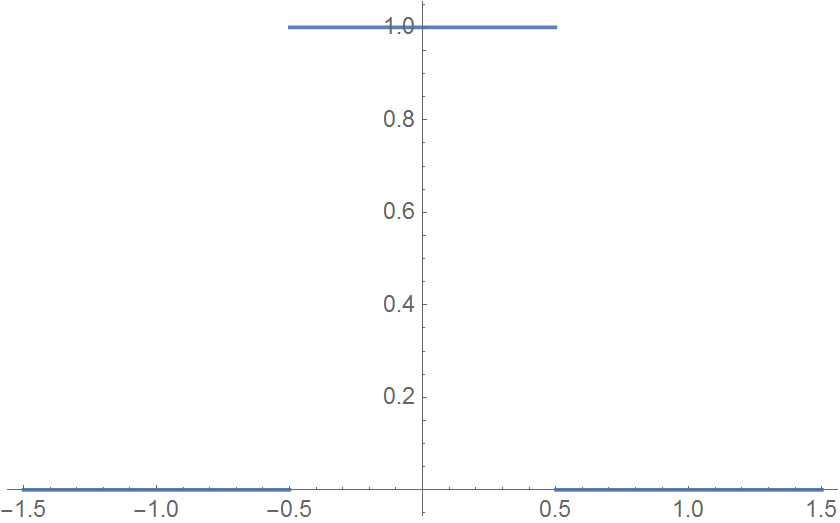

In [37]:
Plot[G1[p]/(2Pi), {p,-1.5,1.5}]

In [38]:
Integrate[G1[p]/(2Pi), {p,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \frac{\text{G1}(p)}{2 \pi } \, dp=1$$

In [39]:
G2[p_] = Integrate[g[1/2,q]g[1/3,p-q]/(2Pi), {q,-Infinity,Infinity}];
G2[p] // TeX[HoldForm[G2[p]], "=", #]&

$$\text{G2}(p)=\begin{cases}
 2 \pi & -\frac{1}{6}<p\leq \frac{1}{6} \\
 -\frac{1}{2} \pi (6 p-5) & \frac{1}{6}<p<\frac{5}{6} \\
 \frac{1}{2} \pi (6 p+5) & -\frac{5}{6}<p\leq -\frac{1}{6}
\end{cases}$$


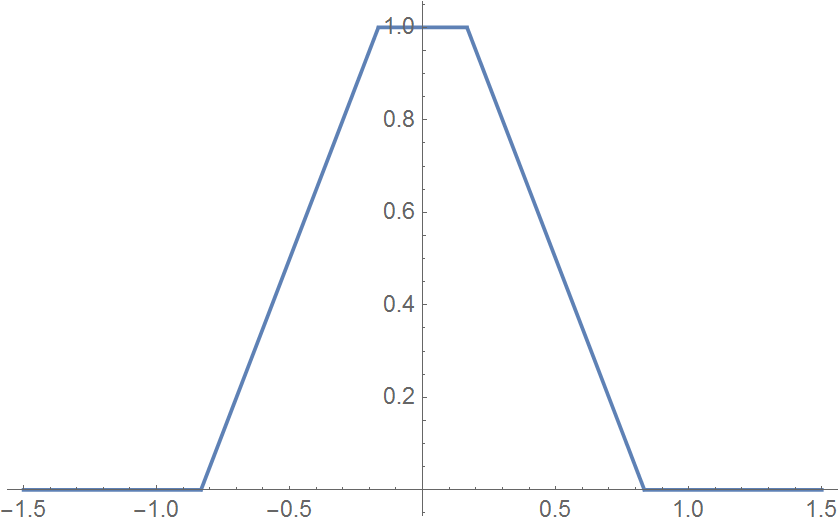

In [41]:
Plot[G2[p]/(2Pi), {p,-1.5,1.5}]

In [42]:
Integrate[G2[p]/(2Pi), {p,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \frac{\text{G2}(p)}{2 \pi } \, dp=1$$

In [43]:
G3[p_] = Integrate[G2[q]g[1/4,p-q]/(2Pi), {q,-Infinity,Infinity}];
G3[p] // TeX[HoldForm[G3[p]], "=", #]&

$$\text{G3}(p)=\begin{cases}
 \frac{1}{2} (5 \pi -6 \pi p) & \frac{5}{12}<p<\frac{7}{12} \\
 \frac{1}{2} (6 \pi p+5 \pi ) & -\frac{7}{12}<p\leq -\frac{5}{12} \\
 \frac{1}{24} \left(47 \pi -144 \pi p^2\right) & -\frac{1}{12}<p<\frac{1}{12} \\
 \frac{1}{48} \left(-144 \pi p^2-24 \pi p+95 \pi \right) & \frac{1}{12}<p<\frac{5}{12} \\
 \frac{1}{48} \left(-144 \pi p^2+24 \pi p+95 \pi \right) & -\frac{5}{12}<p\leq -\frac{1}{12} \\
 \frac{1}{48} \left(-144 \pi p^2+168 \pi p+79 \pi \right) & p=\frac{1}{12} \\
 \frac{1}{16} \left(-48 \pi p^2+56 \pi p+5 \pi \right) & p=\frac{5}{12} \\
 \frac{1}{48} \left(144 \pi p^2-312 \pi p+169 \pi \right) & \frac{7}{12}\leq p<\frac{13}{12} \\
 \frac{1}{48} \left(144 \pi p^2+312 \pi p+169 \pi \right) & -\frac{13}{12}<p\leq -\frac{7}{12}
\end{cases}$$


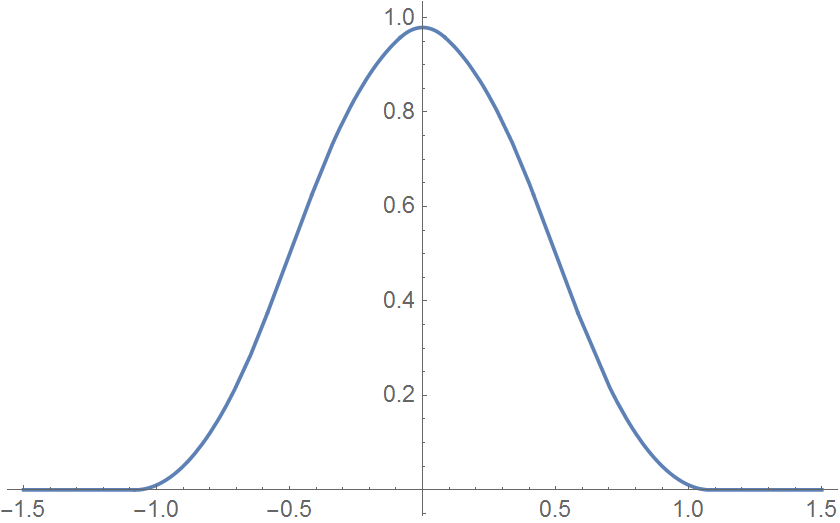

In [45]:
Plot[G3[p]/(2Pi), {p,-1.5,1.5}]

In [46]:
Integrate[G3[p]/(2Pi), {p,-Infinity,Infinity}] // TeXEq

$$\int_{-\infty }^{\infty } \frac{\text{G3}(p)}{2 \pi } \, dp=1$$

In [47]:
Pi Integrate[G3[p]/(2Pi), {p,-1,1}] // TeXEq

$$\pi \int_{-1}^1 \frac{\text{G3}(p)}{2 \pi } \, dp=\frac{1727 \pi }{1728}$$

次に $I_k(p) = g_0*g_1*\cdots*g_k(p)$ を計算して, $I_k(0)$ を計算し, $I_k(p)/\pi$ プロットしてみよう.

In [48]:
I0[p_] = g[1,p];
I0[p] // TeX[HoldForm[I0[p]], "=", #]&

$$\text{I0}(p)=\pi \text{If}[-1\leq p\leq 1,1,0]$$

In [50]:
I0[0] // TeXEq

$$\text{I0}(0)=\pi$$


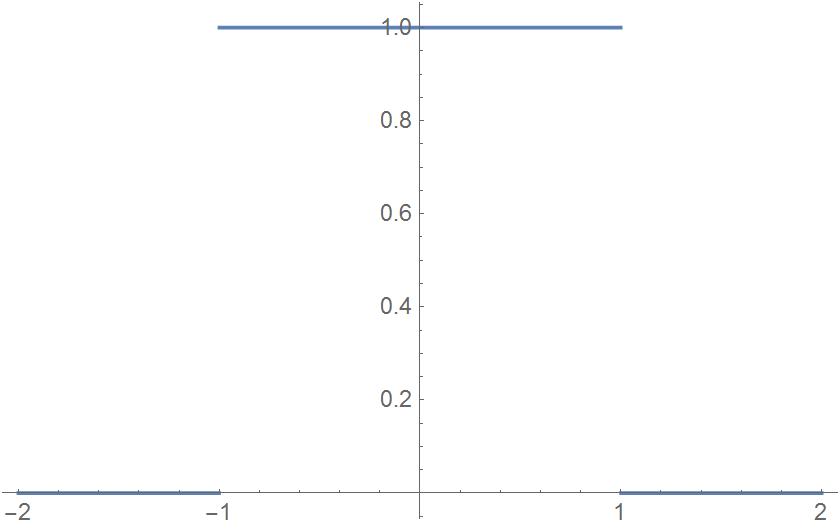

In [51]:
Plot[I0[p]/Pi, {p,-2,2}]

In [52]:
I1[p_] = Integrate[I0[q]g[1/2,p-q]/(2Pi), {q,-Infinity,Infinity}];
I1[p] // TeX[HoldForm[I1[p]], "=", #]&

$$\text{I1}(p)=\begin{cases}
 \pi & -\frac{1}{2}<p\leq \frac{1}{2} \\
 -\frac{1}{2} \pi (2 p-3) & \frac{1}{2}<p<\frac{3}{2} \\
 \frac{1}{2} \pi (2 p+3) & -\frac{3}{2}<p\leq -\frac{1}{2}
\end{cases}$$

In [54]:
I1[0] // TeXEq

$$\text{I1}(0)=\pi$$


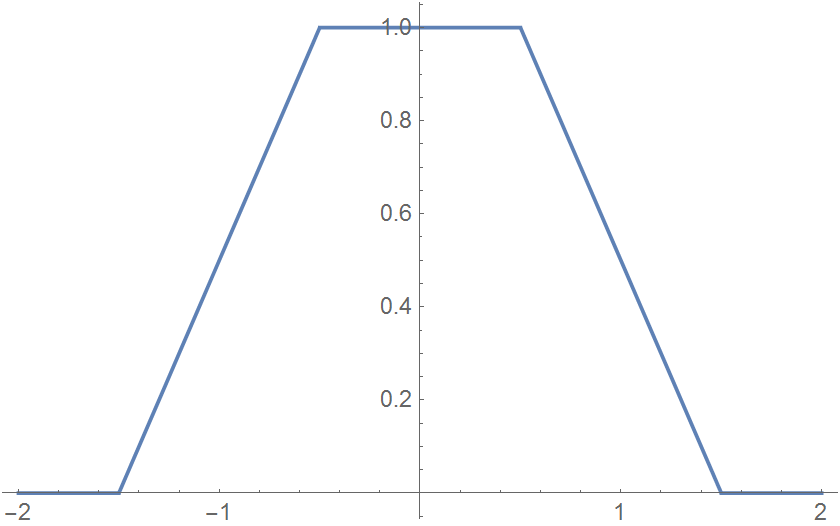

In [55]:
Plot[I1[p]/Pi, {p,-2,2}]

In [56]:
I2[p_] = Integrate[I1[q]g[1/3,p-q]/(2Pi), {q,-Infinity,Infinity}];
I2[p] // TeX[HoldForm[I2[p]], "=", #]&

$$\text{I2}(p)=\begin{cases}
 \pi & -\frac{1}{6}<p\leq \frac{1}{6} \\
 \frac{1}{4} \pi (6 p+5) & p=-\frac{1}{6} \\
 \frac{1}{2} (3 \pi -2 \pi p) & \frac{5}{6}<p<\frac{7}{6} \\
 \frac{1}{2} (2 \pi p+3 \pi ) & -\frac{7}{6}<p\leq -\frac{5}{6} \\
 \frac{1}{48} \left(-36 \pi p^2-12 \pi p+47 \pi \right) & -\frac{5}{6}<p<-\frac{1}{6} \\
 \frac{1}{48} \left(-36 \pi p^2+12 \pi p+47 \pi \right) & \frac{1}{6}<p<\frac{5}{6} \\
 \frac{1}{48} \left(-36 \pi p^2+84 \pi p-13 \pi \right) & p=\frac{5}{6} \\
 \frac{1}{48} \left(36 \pi p^2-132 \pi p+121 \pi \right) & \frac{7}{6}\leq p<\frac{11}{6} \\
 \frac{1}{48} \left(36 \pi p^2+132 \pi p+121 \pi \right) & -\frac{11}{6}<p\leq -\frac{7}{6}
\end{cases}$$

In [58]:
I2[0] // TeXEq

$$\text{I2}(0)=\pi$$


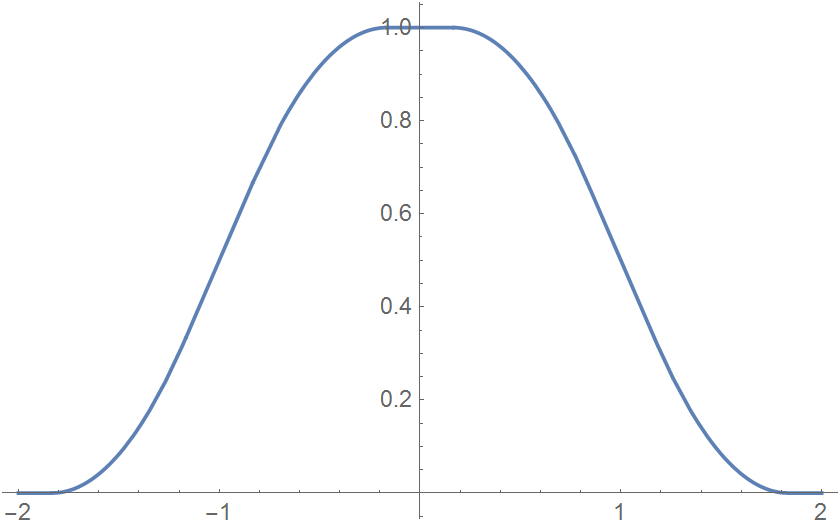

In [59]:
Plot[I2[p]/Pi, {p,-2,2}]

In [60]:
I3[p_] = Integrate[I2[q]g[1/4,p-q]/(2Pi), {q,-Infinity,Infinity}];
I3[p] // TeX[HoldForm[I3[p]], "=", #]&

$$\text{I3}(p)=\begin{cases}
 \frac{1727 \pi -432 \pi p^2}{1728} & -\frac{1}{12}<p<\frac{1}{12} \\
 \frac{1}{192} \left(-144 \pi p^2-48 \pi p+185 \pi \right) & -\frac{7}{12}<p<-\frac{5}{12} \\
 \frac{1}{192} \left(-144 \pi p^2+48 \pi p+185 \pi \right) & \frac{5}{12}<p<\frac{7}{12} \\
 \frac{1}{192} \left(144 \pi p^2-528 \pi p+487 \pi \right) & \frac{17}{12}<p<\frac{19}{12} \\
 \frac{1}{192} \left(144 \pi p^2+528 \pi p+487 \pi \right) & -\frac{19}{12}<p\leq -\frac{17}{12} \\
 \frac{-1728 \pi p^3-5616 \pi p^2-2628 \pi p+2987 \pi }{3456} & -\frac{11}{12}<p<-\frac{7}{12} \\
 \frac{-1728 \pi p^3-4752 \pi p^2-900 \pi p+3853 \pi }{3456} & -\frac{17}{12}<p\leq -\frac{13}{12} \\
 \frac{-1728 \pi p^3-2160 \pi p^2+6012 \pi p+6851 \pi }{3456} & p=-\frac{7}{12} \\
 \frac{-1728 \pi p^3-2160 \pi p^2+6012 \pi p+8003 \pi }{3456} & p=-\frac{11}{12} \\
 \frac{-1728 \pi p^3-432 \pi p^2-36 \pi p+3455 \pi }{3456} & \frac{1}{12}<p<\frac{5}{12} \\
 \frac{-1728 \pi p^3-432 \pi p^2+6876 \pi p+575 \pi }{3456} & p=\frac{5}{12} \\
 \frac{-1728 \pi p^3-432 \pi p^2+6876 \pi p+2879 \pi }{3456} & p=\frac{1}{12} \\
 \frac{-1728 \pi p^3+10800 \pi p^2-22500 \pi p+15625 \pi }{3456} & \frac{19}{12}\leq p<\frac{25}{12} \\
 \frac{1}{48} \left(-48 \pi p^3-144 \pi p^2-97 \pi p+23 \pi \right) & -\frac{13}{12}<p<-\frac{11}{12} \\
 \frac{1}{48} \left(48 \pi p^3-144 \pi p^2+97 \pi p+23 \pi \right) & \frac{11}{12}<p<\frac{13}{12} \\
 \frac{1728 \pi p^3-8208 \pi p^2+12996 \pi p-6347 \pi }{3456} & p=\frac{17}{12} \\
 \frac{1728 \pi p^3-8208 \pi p^2+12996 \pi p-5195 \pi }{3456} & p=\frac{13}{12} \\
 \frac{1728 \pi p^3-5616 \pi p^2+2628 \pi p+2987 \pi }{3456} & \frac{7}{12}<p<\frac{11}{12} \\
 \frac{1728 \pi p^3-4752 \pi p^2+900 \pi p+3853 \pi }{3456} & \frac{13}{12}<p<\frac{17}{12} \\
 \frac{1728 \pi p^3-2160 \pi p^2-6012 \pi p+6851 \pi }{3456} & p=\frac{7}{12} \\
 \frac{1728 \pi p^3-2160 \pi p^2-6012 \pi p+8003 \pi }{3456} & p=\frac{11}{12} \\
 \frac{1728 \pi p^3-432 \pi p^2-6876 \pi p+575 \pi }{3456} & p=-\frac{5}{12} \\
 \frac{1728 \pi p^3-432 \pi p^2+36 \pi p+3455 \pi }{3456} & -\frac{5}{12}<p\leq -\frac{1}{12} \\
 \frac{1728 \pi p^3+10800 \pi p^2+22500 \pi p+15625 \pi }{3456} & -\frac{25}{12}<p\leq -\frac{19}{12}
\end{cases}$$

In [62]:
I3[0] // TeXEq

$$\text{I3}(0)=\frac{1727 \pi }{1728}$$


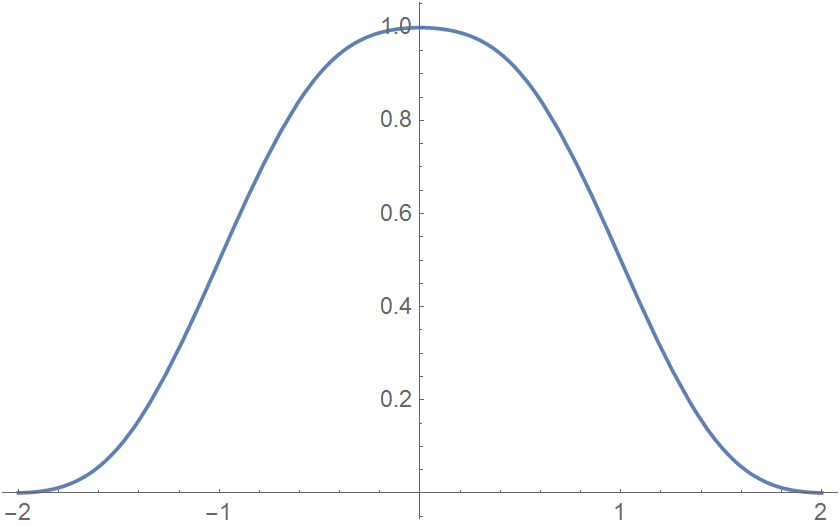

In [63]:
Plot[I3[p]/Pi, {p,-2,2}]